In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # For tree map plot
from wordcloud import WordCloud  # For word cloud plot
import numpy as np
from mpl_toolkits.basemap import Basemap


demographics_file = 'm5_survey_data_demographics.csv'
technologies_file = 'm5_survey_data_technologies_normalised.csv'

df_demographics = pd.read_csv(demographics_file)
df_technologies = pd.read_csv(technologies_file)

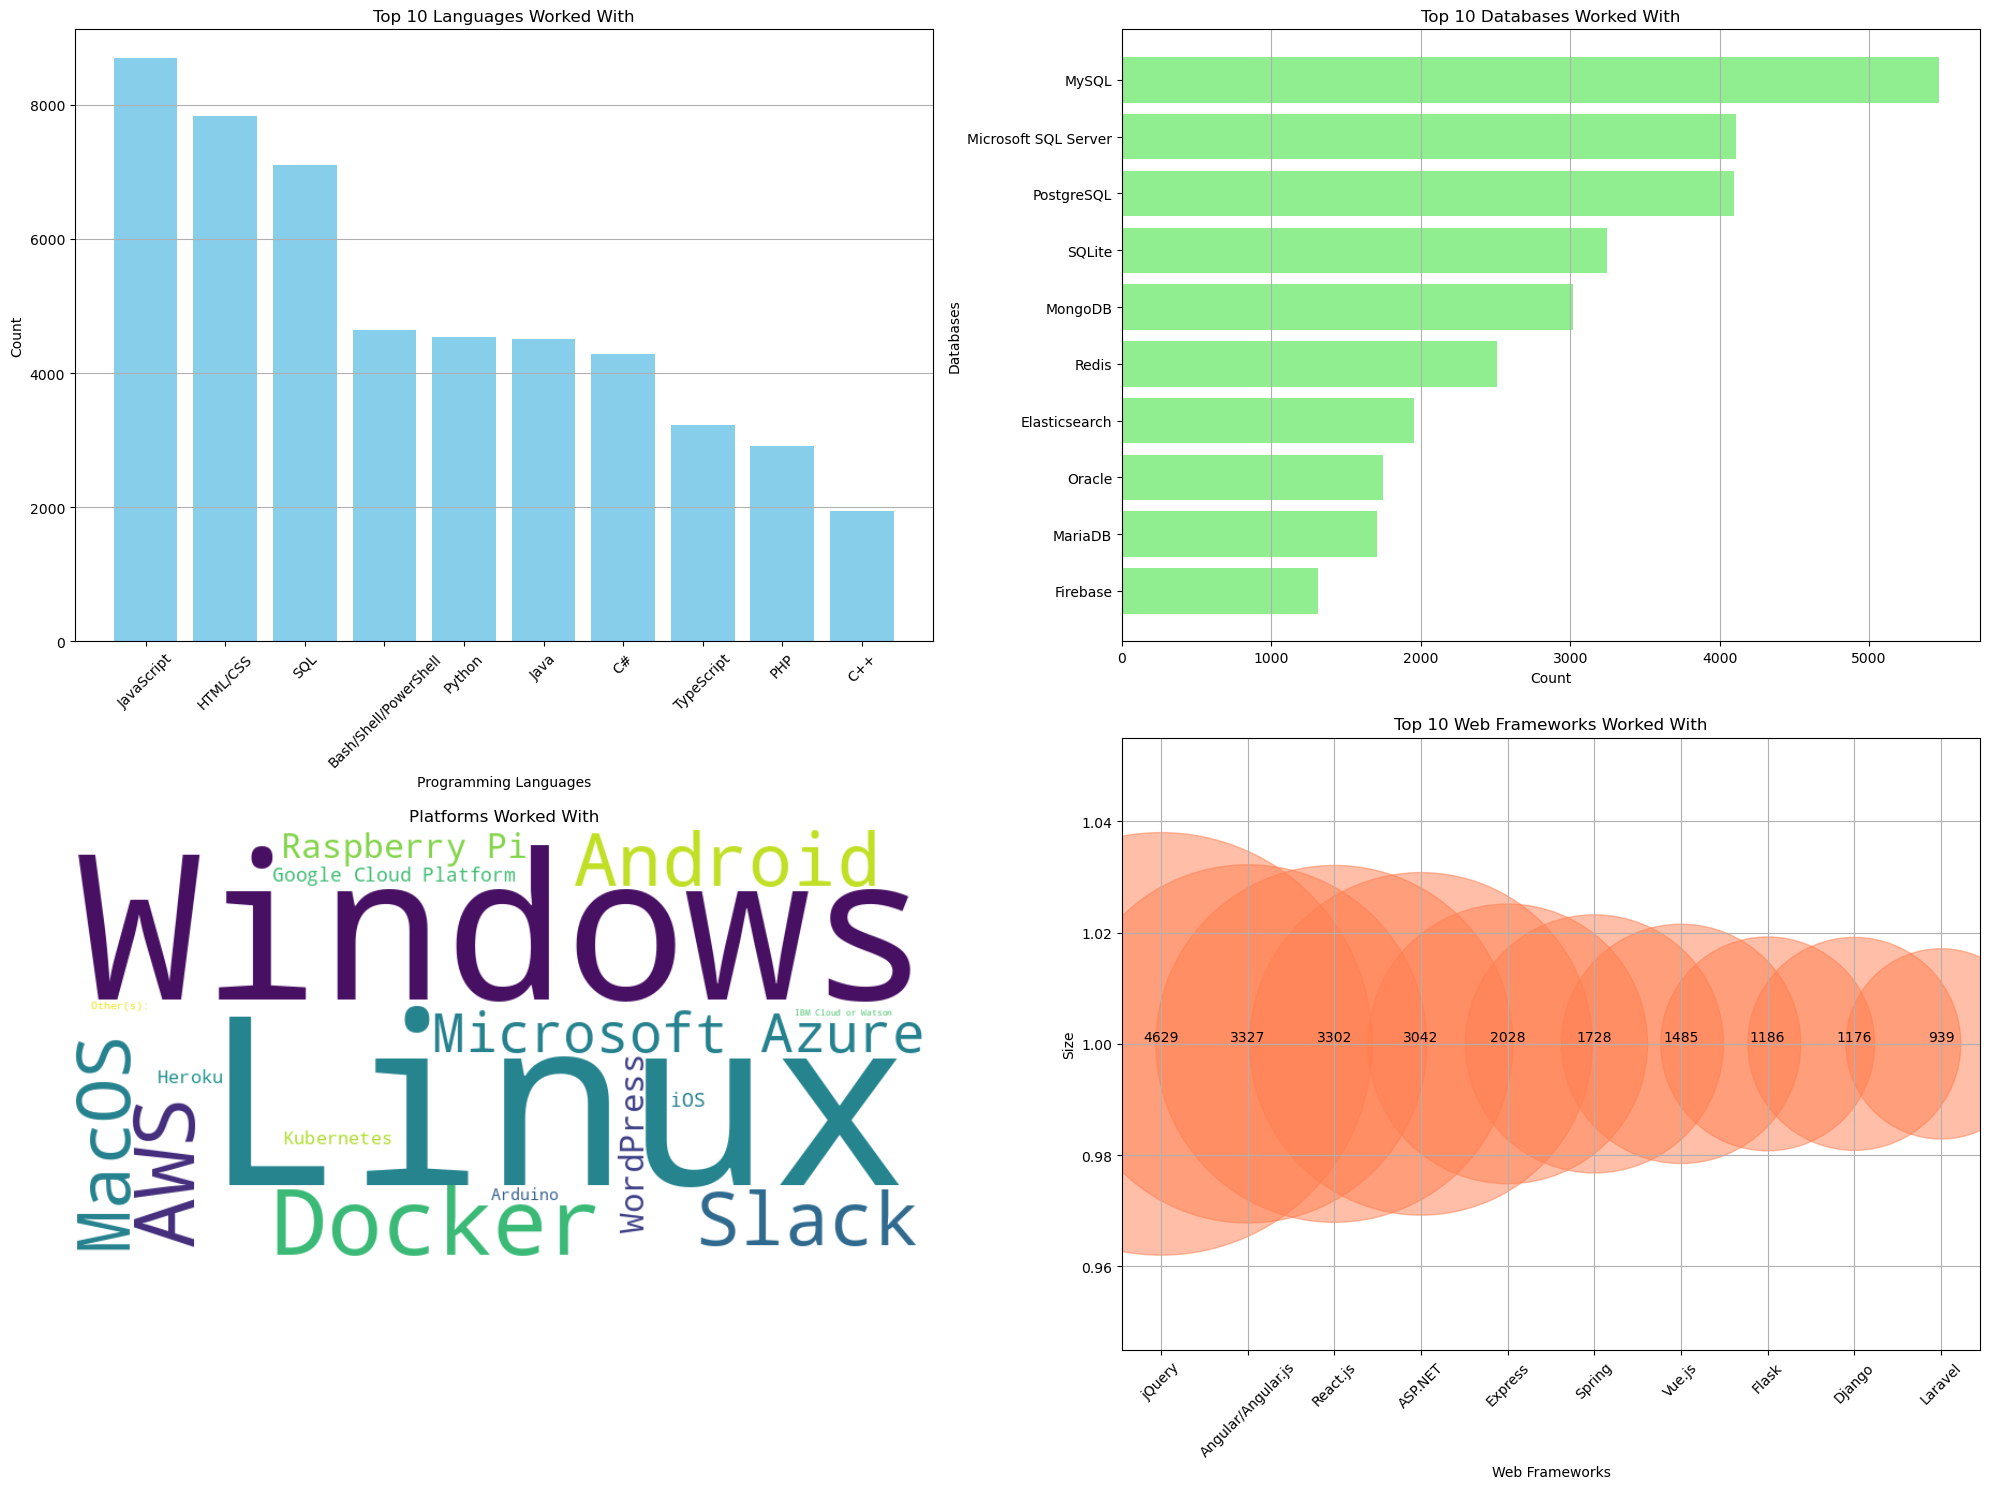

In [13]:
# Top 10 Languages Worked With
top_10_languages = df_technologies['LanguageWorkedWith'].value_counts().head(10)

# Top 10 Databases Worked With
top_10_databases = df_technologies['DatabaseWorkedWith'].value_counts().head(10)

# Platforms Worked With (create a dictionary for WordCloud)
platforms_dict = df_technologies['PlatformWorkedWith'].value_counts().to_dict()

# Top 10 Web Frameworks Worked With
top_10_webframeworks = df_technologies['WebFrameWorkedWith'].value_counts().head(10)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Panel 1: Top 10 Languages Worked With (Bar chart)
axs[0, 0].bar(top_10_languages.index, top_10_languages.values, color='skyblue')
axs[0, 0].set_title('Top 10 Languages Worked With')
axs[0, 0].set_xlabel('Programming Languages')
axs[0, 0].set_ylabel('Count')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(axis='y')

# Panel 2: Top 10 Databases Worked With (Column chart)
axs[0, 1].barh(top_10_databases.index, top_10_databases.values, color='lightgreen')
axs[0, 1].set_title('Top 10 Databases Worked With')
axs[0, 1].set_xlabel('Count')
axs[0, 1].set_ylabel('Databases')
axs[0, 1].invert_yaxis()  # Invert y-axis to show highest count at the top
axs[0, 1].grid(axis='x')

# Panel 3: Platforms Worked With (Word cloud chart)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(platforms_dict)
axs[1, 0].imshow(wordcloud, interpolation='bilinear')
axs[1, 0].set_title('Platforms Worked With')
axs[1, 0].axis('off')

# Panel 4: Top 10 Web Frameworks Worked With (Hierarchy bubble chart)
sizes = top_10_webframeworks.values * 20  # Scale the sizes for better visualization
axs[1, 1].scatter(top_10_webframeworks.index, [1] * len(top_10_webframeworks), s=sizes, alpha=0.5, color='coral')

for i, framework in enumerate(top_10_webframeworks.index):
    axs[1, 1].text(framework, 1, top_10_webframeworks.values[i], ha='center', va='bottom')

axs[1, 1].set_title('Top 10 Web Frameworks Worked With')
axs[1, 1].set_xlabel('Web Frameworks')
axs[1, 1].set_ylabel('Size')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

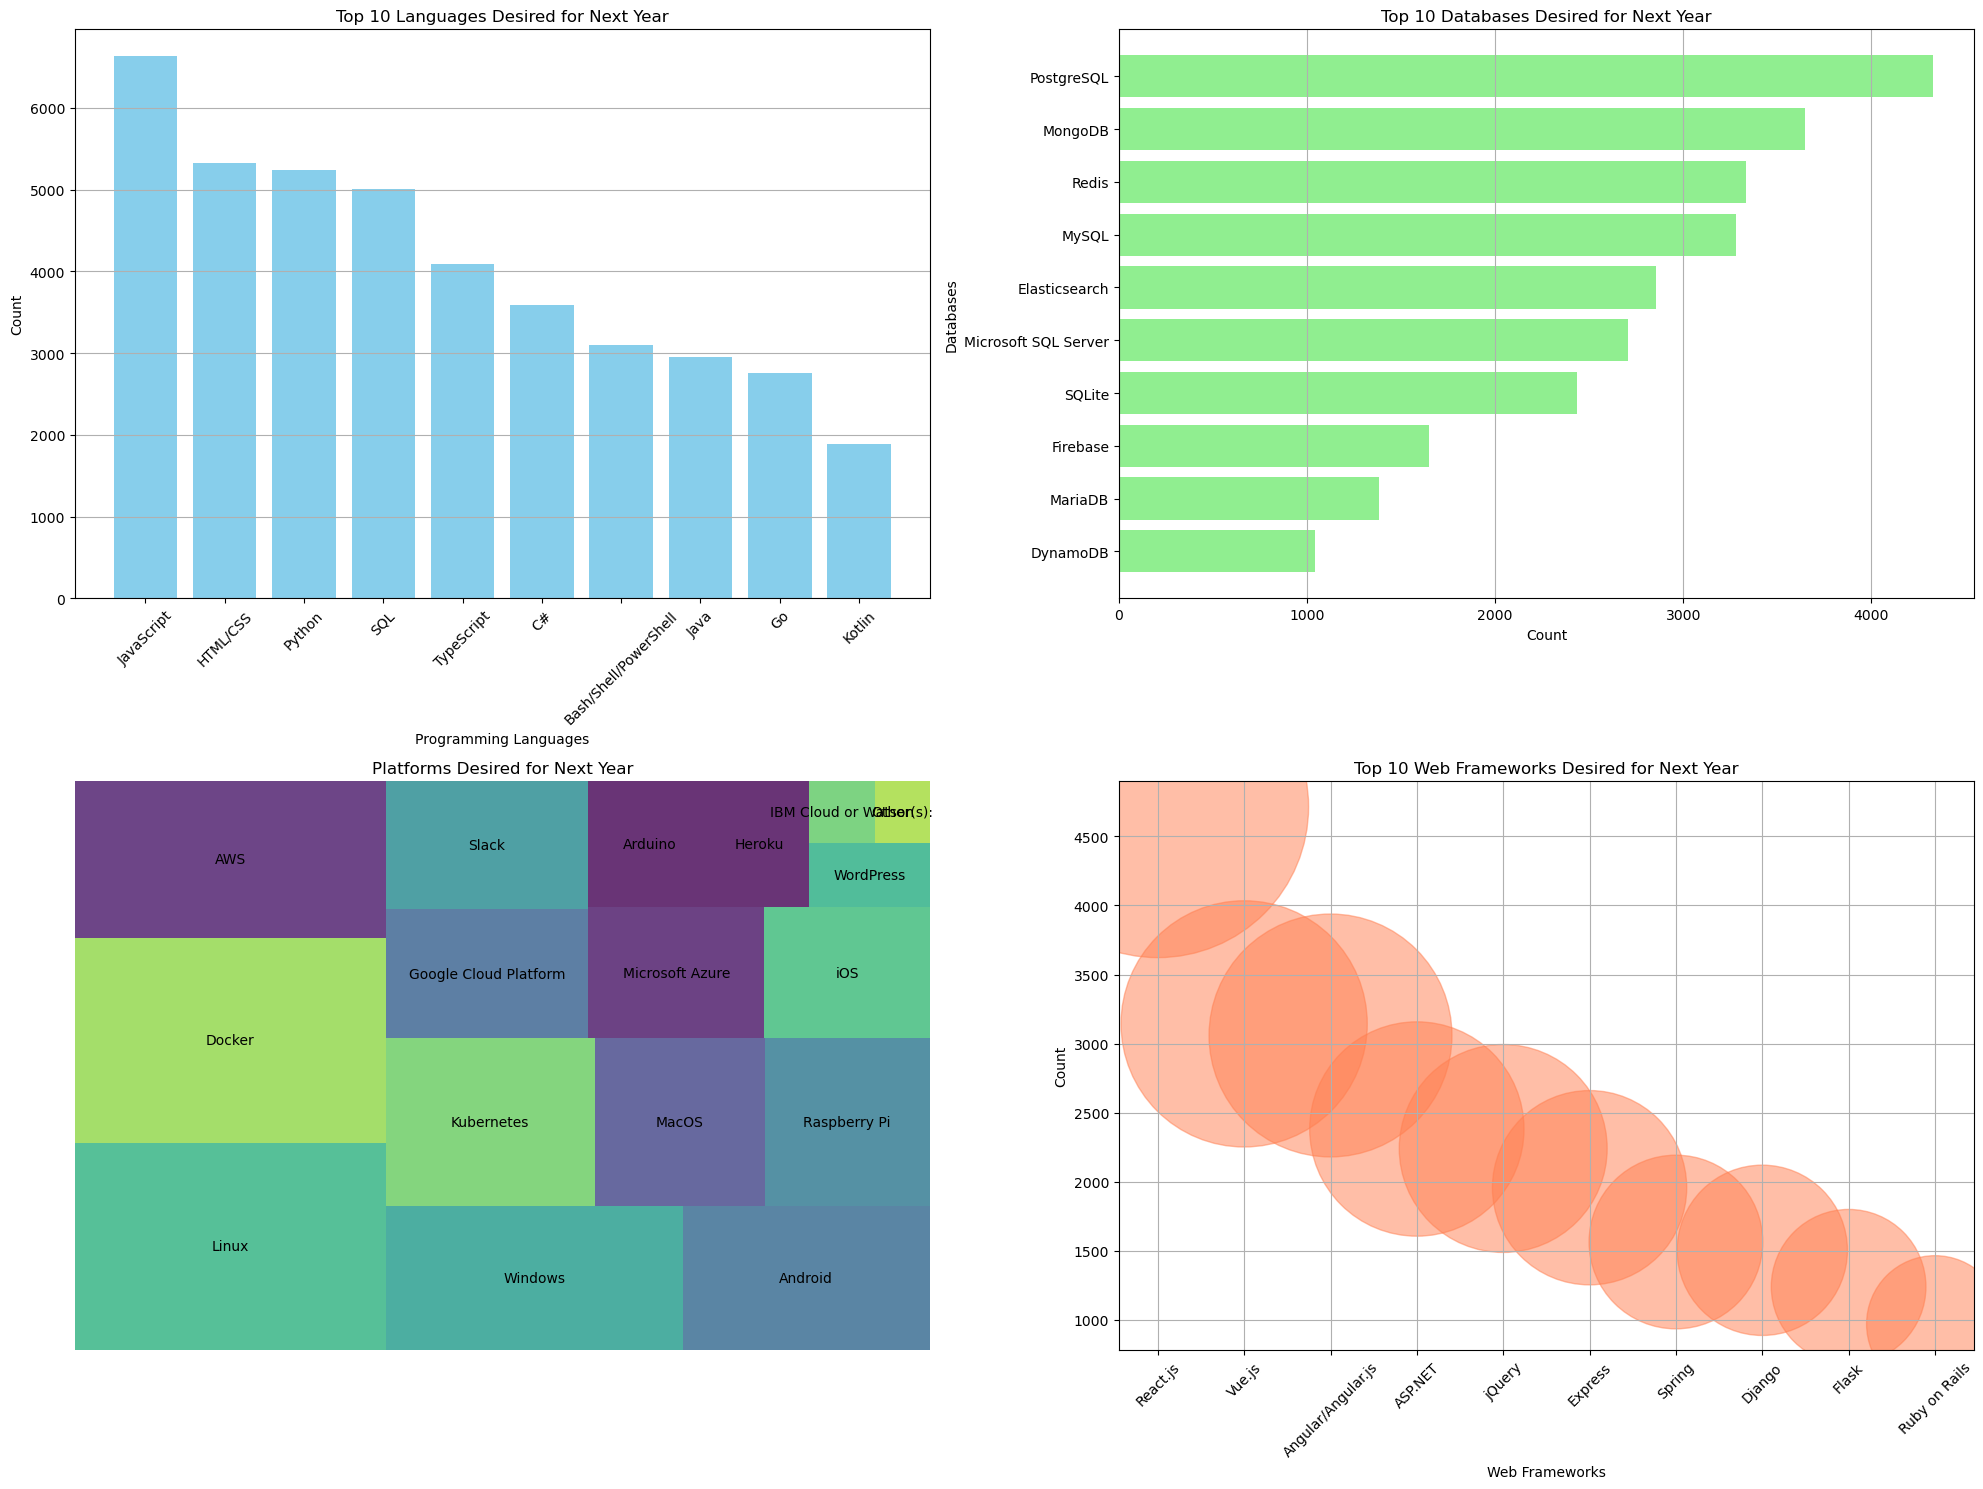

In [14]:
# Top 10 Languages Desired for Next Year (Bar chart)
top_10_languages_desired_future = df_technologies['LanguageDesireNextYear'].value_counts().head(10)

# Top 10 Databases Desired for Next Year (Column chart)
top_10_databases_desired_future = df_technologies['DatabaseDesireNextYear'].value_counts().head(10)

# Desired Platforms for Next Year (Tree map chart)
platforms_desired_future = df_technologies['PlatformDesireNextYear'].value_counts()

# Top 10 Web Frameworks Desired for Next Year (Hierarchy bubble chart)
top_10_webframeworks_desired_future = df_technologies['WebFrameDesireNextYear'].value_counts().head(10)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Panel 1: Top 10 Languages Desired for Next Year (Bar chart)
axs[0, 0].bar(top_10_languages_desired_future.index, top_10_languages_desired_future.values, color='skyblue')
axs[0, 0].set_title('Top 10 Languages Desired for Next Year')
axs[0, 0].set_xlabel('Programming Languages')
axs[0, 0].set_ylabel('Count')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(axis='y')

# Panel 2: Top 10 Databases Desired for Next Year (Column chart)
axs[0, 1].barh(top_10_databases_desired_future.index, top_10_databases_desired_future.values, color='lightgreen')
axs[0, 1].set_title('Top 10 Databases Desired for Next Year')
axs[0, 1].set_xlabel('Count')
axs[0, 1].set_ylabel('Databases')
axs[0, 1].invert_yaxis()  # Invert y-axis to show highest count at the top
axs[0, 1].grid(axis='x')

# Panel 3: Desired Platforms for Next Year (Tree map chart)
sizes_future = platforms_desired_future.values
squarify.plot(sizes=sizes_future, label=platforms_desired_future.index, alpha=0.8, ax=axs[1, 0])
axs[1, 0].set_title('Platforms Desired for Next Year')
axs[1, 0].axis('off')

# Panel 4: Top 10 Web Frameworks Desired for Next Year (Hierarchy bubble chart)
sizes_future = top_10_webframeworks_desired_future.values * 10  # Scale for better visualization
axs[1, 1].scatter(top_10_webframeworks_desired_future.index, top_10_webframeworks_desired_future.values, s=sizes_future, color='coral', alpha=0.5)
axs[1, 1].set_title('Top 10 Web Frameworks Desired for Next Year')
axs[1, 1].set_xlabel('Web Frameworks')
axs[1, 1].set_ylabel('Count')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

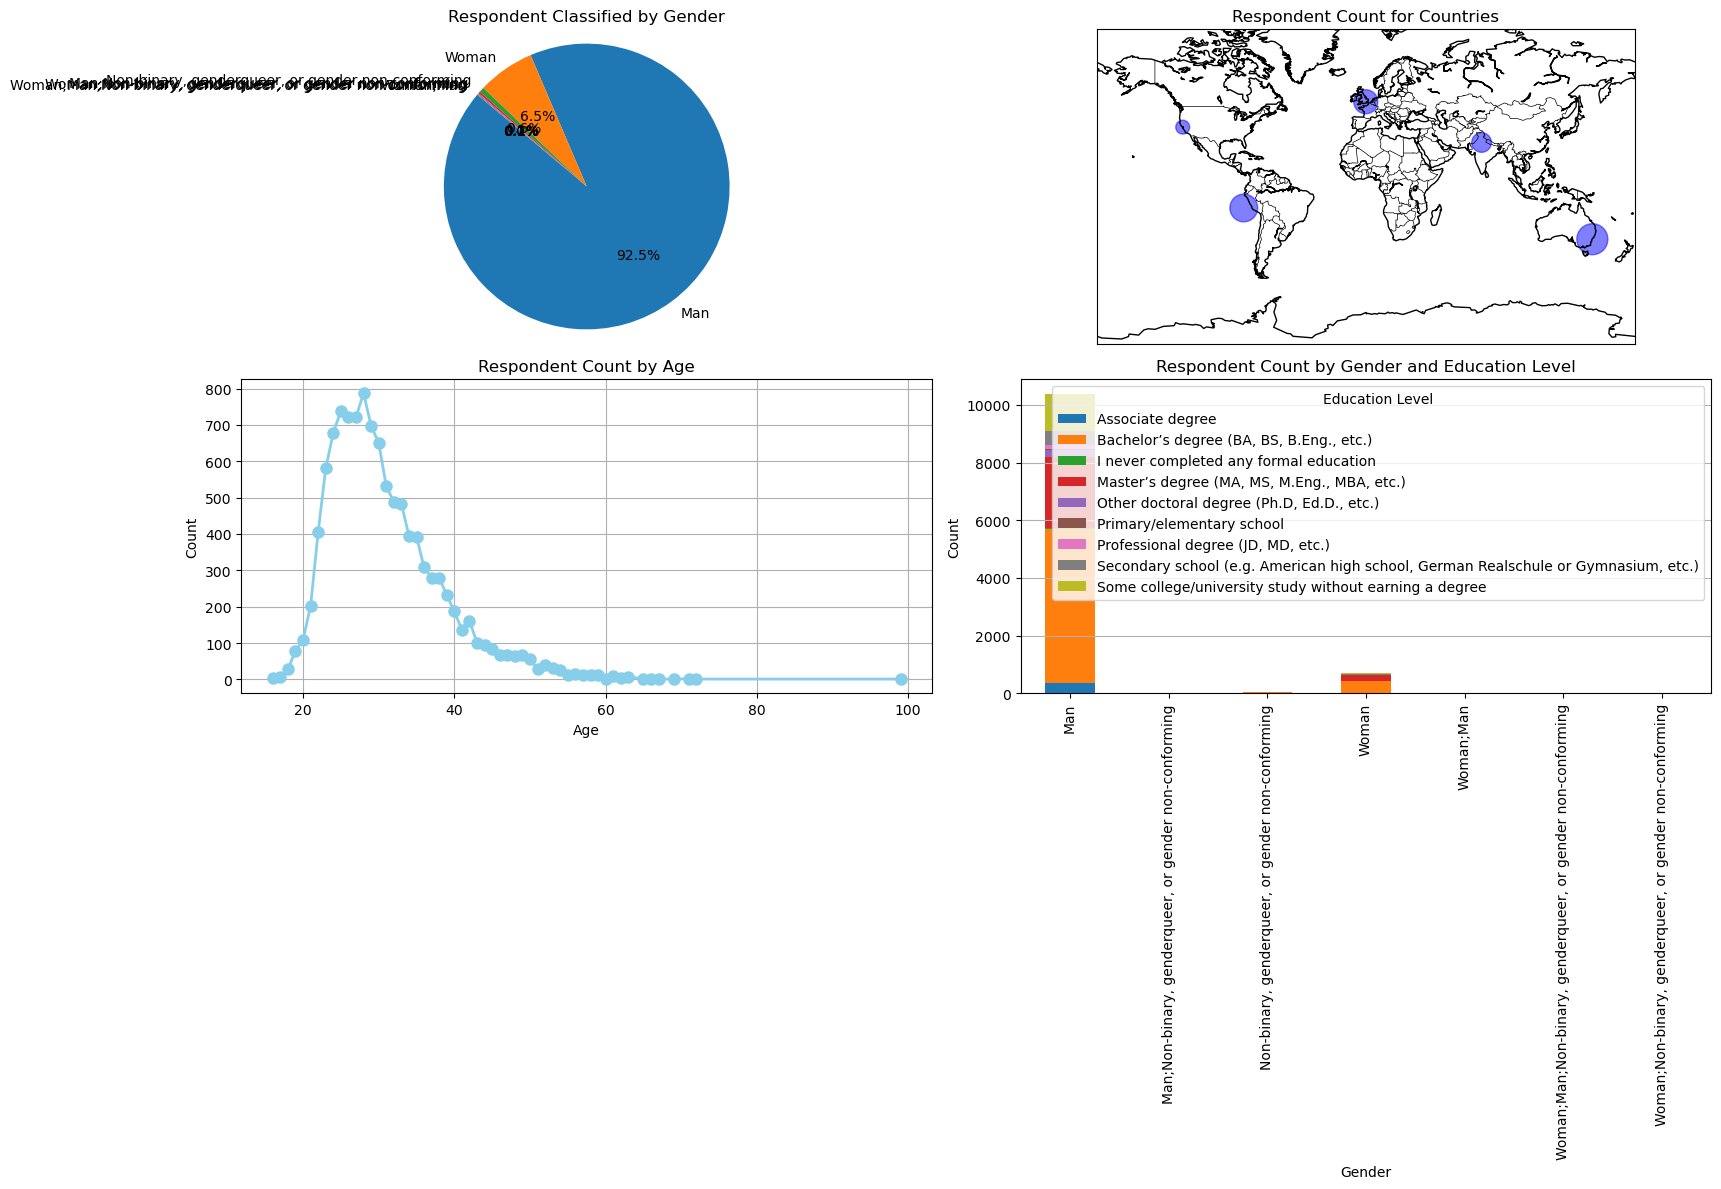

In [15]:

# Panel 1: Respondent classified by Gender (Pie chart)
gender_counts = df_demographics['Gender'].value_counts()

# Panel 2: Respondent Count for Countries (Map chart)
# Example data for illustration purposes
countries = ['USA', 'India', 'UK', 'Brazil', 'Australia']
sizes = [100, 200, 300, 400, 500]
lats = [37.77, 28.61, 51.51, -14.24, -33.87]
lons = [-122.42, 77.21, -0.13, -81.63, 151.21]

# Panel 3: Respondent Count by Age (Line chart)
age_counts = df_demographics['Age'].value_counts().sort_index()

# Panel 4: Respondent Count by Gender, classified by Formal Education Level (Stacked bar chart)
gender_edu_counts = df_demographics.groupby(['Gender', 'EdLevel']).size().unstack()

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Panel 1: Respondent classified by Gender (Pie chart)
axs[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Respondent Classified by Gender')
axs[0, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Panel 2: Respondent Count for Countries (Map chart)
axs[0, 1].set_title('Respondent Count for Countries')
m = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=axs[0, 1])
m.drawcoastlines()
m.drawcountries()
m.scatter(lons, lats, latlon=True, s=sizes, alpha=0.5, color='blue')

# Panel 3: Respondent Count by Age (Line chart)
axs[1, 0].plot(age_counts.index, age_counts.values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
axs[1, 0].set_title('Respondent Count by Age')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Count')
axs[1, 0].grid(True)

# Panel 4: Respondent Count by Gender, classified by Formal Education Level (Stacked bar chart)
gender_edu_counts.plot(kind='bar', stacked=True, ax=axs[1, 1])
axs[1, 1].set_title('Respondent Count by Gender and Education Level')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Count')
axs[1, 1].grid(axis='y')
axs[1, 1].legend(title='Education Level')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()